#1st program and output:

In [ ]:
#Sample Python Program
print("Hello, World!")

#Example of a simple calculation
a = 5
b = 10
sum = a+b
print(f"The sum of {a} and {b} is {sum}")

Hello, World!
The sum of 5 and 10 is 15


##Plotting program(optional):

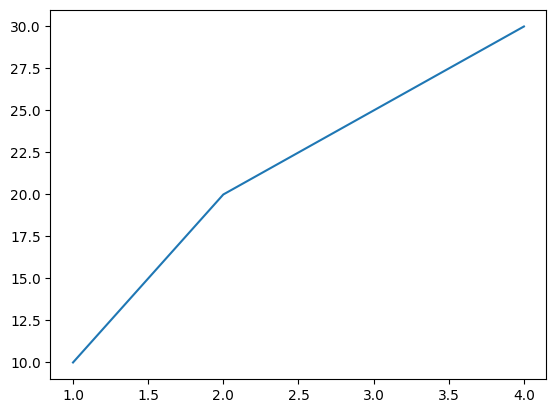

In [ ]:
import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]
plt.plot(x, y)
plt.show()

#2nd Program and output:

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
# Use np.loadtxt instead of loadtxt
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
# Split into input (X) and output (y)
X = dataset[:, 0:8]
y = dataset[:, 8]

# Define the Keras model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the Keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10, verbose=0)

# Make class predictions with the model
predictions = (model.predict(X) > 0.5).astype(int)

# Summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 1)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 1 (expected 1)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 1 (expected 1)


<ipython-input-16-bd0feab2c6e8>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


#3rd program and output:

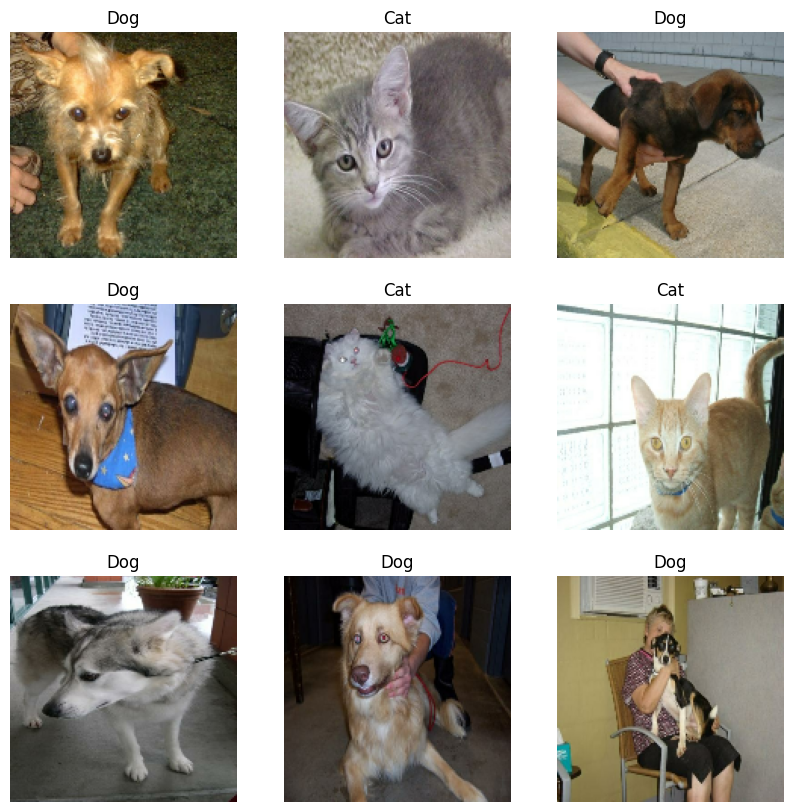

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1282s 2s/step - accuracy: 0.5652 - loss: 0.7470 - val_accuracy: 0.6916 - val_loss: 0.5685
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 1231s 2s/step - accuracy: 0.7559 - loss: 0.5026 - val_accuracy: 0.7750 - val_loss: 0.4689
Epoch 3/15


In [ ]:

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset
dataset, info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True)

# Split into training and validation datasets
train_dataset = dataset['train'].take(20000)  # Take the first 20,000 examples
val_dataset = dataset['train'].skip(20000).take(5000)  # Use the next 5,000 for validation

# Preprocess the dataset
IMG_SIZE = 150  # Resize images to 150x150

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize image
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

train_dataset = train_dataset.map(preprocess).batch(32).shuffle(1000)
val_dataset = val_dataset.map(preprocess).batch(32)

# Visualize sample images
for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title("Cat" if labels[i] == 0 else "Dog")
        plt.axis("off")
    plt.show()

# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    validation_data=val_dataset
)

# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

# Save the model
model.save('cnn_cats_vs_dogs_model.h5')
print("Model training completed and saved as 'cnn_cats_vs_dogs_model.h5'.")

#4th program and output:

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras import backend as k

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Input image dimensions
img_rows, img_cols = 28, 28

# Reshape data based on the image data format
if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
input_layer = Input(shape=input_shape)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
output_layer = Dense(10, activation='softmax')(layer6)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(
    optimizer='adadelta',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=12, batch_size=500, verbose=1)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {score[0]}')
print(f'Accuracy: {score[1]}')

#5th program and output:

In [ ]:

import pandas as pd
import numpy as np
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Input
from tensorflow.keras import backend as K
from gensim.models import KeyedVectors

# Load data
data = pd.read_csv('imdb_labelled.csv', header=None, delimiter='\t')
data.columns = ['Text', 'Label']

# Function to remove punctuation
def remove_punct(text):
    return re.sub('[' + string.punctuation + ']', '', text)

# Apply remove_punct function to clean text
data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))

# Tokenize the text
tokens = [word_tokenize(sen) for sen in data.Text_Clean]

# Function to convert tokens to lowercase
def lower_token(tokens):
    return [w.lower() for w in tokens]

lower_tokens = [lower_token(token) for token in tokens]

# Remove stop words
stoplist = stopwords.words('english')

def removeStopWords(tokens):
    return [word for word in tokens if word not in stoplist]

filtered_words = [removeStopWords(sen) for sen in lower_tokens]

# Join the tokens into a single string and create a final column
data['Text_Final'] = [' '.join(sen) for sen in filtered_words]
data['tokens'] = filtered_words

# Create Pos and Neg columns for the binary classification
pos = []
neg = []
for l in data.Label:
    if l == 0:
        pos.append(0)
        neg.append(1)
    elif l == 1:
        pos.append(1)
        neg.append(0)

data['Pos'] = pos
data['Neg'] = neg

# Reorganize the dataframe
data = data[['Text_Final', 'tokens', 'Label', 'Pos', 'Neg']]

# Split the dataset into training and test sets
data_train, data_test = train_test_split(data, test_size=0.10, random_state=42)

# Prepare training and test vocabulary
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))

print(f"{len(all_training_words)} words total, with a vocabulary size of {len(TRAINING_VOCAB)}")
print(f"Max sentence length is {max(training_sentence_lengths)}")

# Prepare test vocabulary
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))

print(f"{len(all_test_words)} words total, with a vocabulary size of {len(TEST_VOCAB)}")
print(f"Max sentence length is {max(test_sentence_lengths)}")

# Load pre-trained Word2Vec embeddings (GoogleNews-vectors-negative300.bin.gz)
word2vec_path = 'GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True)

# Tokenizer for training data
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())

# Convert training text to sequences
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())
train_word_index = tokenizer.word_index
print(f'Found {len(train_word_index)} unique tokens.')

# Pad sequences
MAX_SEQUENCE_LENGTH = 100
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Prepare embedding weights
EMBEDDING_DIM = 300
train_embedding_weights = np.zeros((len(train_word_index) + 1, EMBEDDING_DIM))

for word, index in train_word_index.items():
    if word in word2vec:
        train_embedding_weights[index, :] = word2vec[word]
    else:
        train_embedding_weights[index, :] = np.random.rand(EMBEDDING_DIM)

print(train_embedding_weights.shape)

# CNN model definition
def ConvNet(embeddings, max_sequence_length, num_words, embedding_dim, labels_index):
    embedding_layer = Embedding(num_words, embedding_dim, weights=[embeddings],
                                input_length=max_sequence_length, trainable=False)
    sequence_input = Input(shape=(max_sequence_length,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)

    convs = []
    filter_sizes = [2, 3, 4, 5, 6]
    for filter_size in filter_sizes:
        l_conv = Conv1D(filters=200, kernel_size=filter_size, activation='relu')(embedded_sequences)
        l_pool = GlobalMaxPooling1D()(l_conv)
        convs.append(l_pool)

    l_merge = concatenate(convs, axis=1)
    x = Dropout(0.1)(l_merge)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='sigmoid')(x)

    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    model.summary()

    return model

# Build the CNN model
model = ConvNet(train_embedding_weights, MAX_SEQUENCE_LENGTH, len(train_word_index) + 1, EMBEDDING_DIM, len(list(data.Label.unique())))

# Train the model
num_epochs = 3
batch_size = 32
hist = model.fit(train_cnn_data, data_train['Pos'], epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

# Make predictions
predictions = model.predict(train_cnn_data, batch_size=1024, verbose=1)
labels = [1, 0]
prediction_labels = [labels[np.argmax(p)] for p in predictions]

# Calculate accuracy
accuracy = sum(data_test.Label == prediction_labels) / len(prediction_labels)
print(f'Accuracy: {accuracy}')

#6th program and output:

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize, sent_tokenize
from bs4 import BeautifulSoup
import re
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
imdb_data = pd.read_csv('../input/IMDB Dataset.csv')
print(imdb_data.shape)
print(imdb_data.head(10))

# Summary of the dataset
print(imdb_data.describe())
print(imdb_data['sentiment'].value_counts())

# Split the dataset into train and test
train_reviews = imdb_data.review[:40000]
train_sentiments = imdb_data.sentiment[:40000]
test_reviews = imdb_data.review[40000:]
test_sentiments = imdb_data.sentiment[40000:]

print(train_reviews.shape, train_sentiments.shape)
print(test_reviews.shape, test_sentiments.shape)

# Tokenization
tokenizer = ToktokTokenizer()

# Set English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

# Remove HTML tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Remove text within square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Clean the text (remove HTML, square brackets)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(denoise_text)

# Remove special characters
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_special_characters)

# Stemming the text
def simple_stemmer(text):
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(simple_stemmer)

# Remove stopwords
stop = set(stopwords.words('english'))
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ''.join(filtered_tokens)
    return filtered_text

# Apply function on review column
imdb_data['review'] = imdb_data['review'].apply(remove_stopwords)

# Normalized train reviews
norm_train_reviews = imdb_data.review[:40000]

# Normalized test reviews
norm_test_reviews = imdb_data.review[40000:]

# Count Vectorizer (Bag of Words)
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1, 3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)
print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

# Tfidf Vectorizer
tv = TfidfVectorizer(min_df=0, max_df=1, use_idf=True, ngram_range=(1, 3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)
print('Tfidf_train:', tv_train_reviews.shape)
print('Tfidf_test:', tv_test_reviews.shape)

# Labeling the sentiment data
lb = LabelBinarizer()
sentiment_data = lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

# Split the sentiment data
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

# Training the model (Logistic Regression) for Bag of Words
lr = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)
lr_bow = lr.fit(cv_train_reviews, train_sentiments)
print(lr_bow)

# Training the model (Logistic Regression) for TF-IDF features
lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)

# Predicting the model for Bag of Words
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)

# Predicting the model for TF-IDF features
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

# Accuracy score for Bag of Words
lr_bow_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_score:", lr_bow_score)

# Accuracy score for TF-IDF features
lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_score:", lr_tfidf_score)

# Classification report for Bag of Words
lr_bow_report = classification_report(test_sentiments, lr_bow_predict, target_names=['Positive', 'Negative'])
print(lr_bow_report)

# Classification report for TF-IDF features
lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names=['Positive', 'Negative'])
print(lr_tfidf_report)

# Confusion matrix for Bag of Words
cm_bow = confusion_matrix(test_sentiments, lr_bow_predict, labels=[1, 0])
print(cm_bow)

# Confusion matrix for TF-IDF features
cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels=[1, 0])
print(cm_tfidf)

# Training the model (Linear SVM) for Bag of Words
svm = SGDClassifier(loss='hinge', max_iter=500, random_state=42)
svm_bow = svm.fit(cv_train_reviews, train_sentiments)
print(svm_bow)

# Training the model (Linear SVM) for TF-IDF features
svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print(svm_tfidf)

# Predicting the model for Bag of Words
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)

# Predicting the model for TF-IDF features
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

# Accuracy score for Bag of Words
svm_bow_score = accuracy_score(test_sentiments, svm_bow_predict)
print("svm_bow_score:", svm_bow_score)

# Accuracy score for TF-IDF features
svm_tfidf_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("svm_tfidf_score:", svm_tfidf_score)

# Classification report for Bag of Words
svm_bow_report = classification_report(test_sentiments, svm_bow_predict, target_names=['Positive', 'Negative'])
print(svm_bow_report)

# Classification report for TF-IDF features
svm_tfidf_report = classification_report(test_sentiments, svm_tfidf_predict, target_names=['Positive', 'Negative'])
print(svm_tfidf_report)

# Confusion matrix for Bag of Words
cm_bow = confusion_matrix(test_sentiments, svm_bow_predict, labels=[1, 0])
print(cm_bow)

# Confusion matrix for TF-IDF features
cm_tfidf = confusion_matrix(test_sentiments, svm_tfidf_predict, labels=[1, 0])
print(cm_tfidf)

# Training the model (Naive Bayes) for Bag of Words
mnb = MultinomialNB()
mnb_bow = mnb.fit(cv_train_reviews, train_sentiments)
print(mnb_bow)

# Training the model (Naive Bayes) for TF-IDF features
mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

# Predicting the model for Bag of Words
mnb_bow_predict = mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

# Predicting the model for TF-IDF features
mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

# Accuracy score for Bag of Words
mnb_bow_score = accuracy_score(test_sentiments, mnb_bow_predict)
print("mnb_bow_score:", mnb_bow_score)

# Accuracy score for TF-IDF features
mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("mnb_tfidf_score:", mnb_tfidf_score)

# Classification report for Bag of Words
mnb_bow_report = classification_report(test_sentiments, mnb_bow_predict, target_names=['Positive', 'Negative'])
print(mnb_bow_report)

# Classification report for TF-IDF features
mnb_tfidf_report = classification_report(test_sentiments, mnb_tfidf_predict, target_names=['Positive', 'Negative'])
print(mnb_tfidf_report)

# Confusion matrix for Bag of Words
cm_bow = confusion_matrix(test_sentiments, mnb_bow_predict, labels=[1, 0])
print(cm_bow)

# Confusion matrix for TF-IDF features
cm_tfidf = confusion_matrix(test_sentiments, mnb_tfidf_predict, labels=[1, 0])
print(cm_tfidf)

# Word cloud for positive review words
plt.figure(figsize=(10, 10))
positive_text = ' '.join(norm_train_reviews[train_sentiments == 1])
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)
plt.imshow(WC, interpolation='bilinear')
plt.axis('off')
plt.show()

#7th program and output :

In [ ]:

import keras
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression factor of 24.5, assuming the input is 784 floats

# This is our input image (28x28 pixels flattened into 784)
input_img = keras.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model (decoder layer)
decoder_layer = autoencoder.layers[-1]

# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Display the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Adding L1 activity regularizer to the encoding layer
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu',
                       activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = keras.Model(input_img, decoded)

# Train the autoencoder with L1 regularization
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Adding more layers to the autoencoder
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Create the new autoencoder model with more layers
autoencoder = keras.Model(input_img, decoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#8th program and output:

In [ ]:

import torch
from torch import nn
import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Set the manual seed for reproducibility
torch.manual_seed(111)

# Check if CUDA is available and set the device accordingly
device = ""
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Define transformations for MNIST dataset (normalize and convert to tensor)
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

# Download and load the MNIST training dataset
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

# Display some real samples from the training set
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

# Discriminator class definition
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 1024), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 512), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1), nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), 784)
        output = self.model(x)
        return output

discriminator = Discriminator().to(device=device)

# Generator class definition
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256), nn.ReLU(),
            nn.Linear(256, 512), nn.ReLU(),
            nn.Linear(512, 1024), nn.ReLU(),
            nn.Linear(1024, 784), nn.Tanh()
        )

    def forward(self, x):
        output = self.model(x)
        output = output.view(x.size(0), 1, 28, 28)
        return output

generator = Generator().to(device=device)

# Hyperparameters
lr = 0.0001
num_epochs = 50
loss_function = nn.BCELoss()

# Optimizers for discriminator and generator
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

# Training the GAN
for epoch in range(num_epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples.to(device=device)
        real_samples_labels = torch.ones((batch_size, 1)).to(device=device)

        # Generate random latent space samples (noise)
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1)).to(device=device)

        # Combine real and generated samples for training the discriminator
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat((real_samples_labels, generated_samples_labels))

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator (latent space samples)
        latent_space_samples = torch.randn((batch_size, 100)).to(device=device)

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Display loss after each batch
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

    # Generate some images after each epoch
    latent_space_samples = torch.randn(batch_size, 100).to(device=device)
    generated_samples = generator(latent_space_samples)
    generated_samples = generated_samples.cpu().detach()

    # Display generated samples
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
        plt.xticks([])
        plt.yticks([])

plt.show()